# Multiple series in the same non-stacked bar chart
Based on [this example](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py)
                        

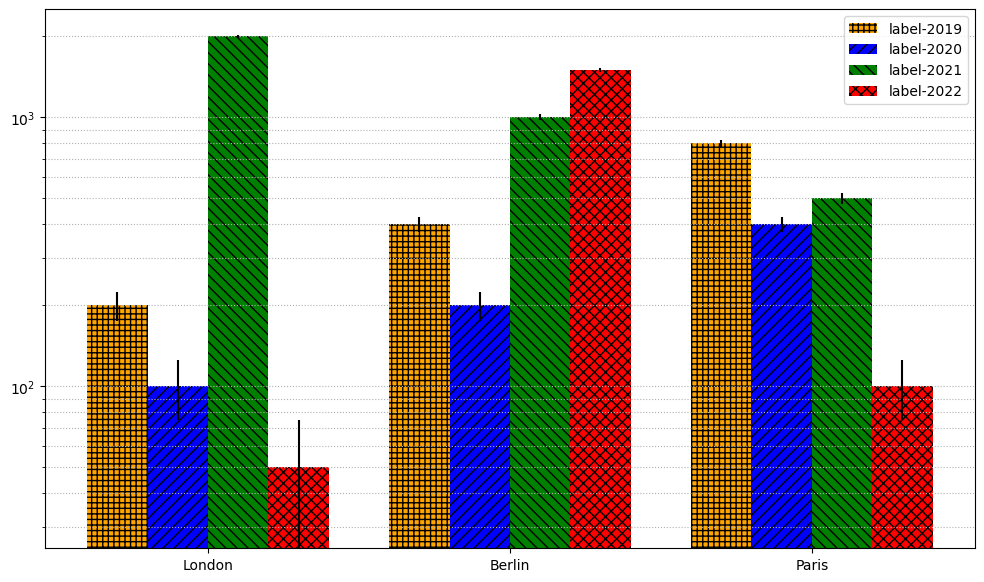

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

"""
Gets the x vector to locate the ibar (starts at 0) correctly, assuming you want to draw
nbar vertical bars and all the bars will take wbar_total units of width, where the bar groups
are spaced 1 unit.

Returns (the x vector, the single bar width, the next ibar )
"""
def bar_get_xs ( ibar, nbars, nlabels, wbar_total = 0.8 ):
  x = np.arange ( nlabels )
  # wbar_total = 0.8 # Because x = 0, 1, 2, you've a total of 1
  wbar = wbar_total / nbars 
  xi = x - wbar_total / 2  + wbar / 2 + ibar * wbar
  return (xi, wbar, ibar + 1)

"""
Sets the x ticks that match what was computed by get_bar_xs()
"""
def bar_set_xticks ( ax, nlabels ):
  x = np.arange ( nlabels )
  ax.set_xticks ( x )


#################### Example Starts Here

d = { 
  "shop": [ "London", "Berlin", "Paris" ],
  "sales-2020": [ 100, 200, 400 ],
  "sales-2021": [ 2000, 1000, 500 ],
  "sales-2022": [ 50, 1500, 100 ]
}
years = [ 2020, 2021, 2022 ]

d = { 
  "shop": [ "London", "Berlin", "Paris" ],
  "sales-2019": [ 200, 400, 800 ],
  "sales-2020": [ 100, 200, 400 ],
  "sales-2021": [ 2000, 1000, 500 ],
  "sales-2022": [ 50, 1500, 100 ]
}
years = [ 2019, 2020, 2021, 2022 ]


colors = { "2019": "Orange", "2020": "Blue", "2021": "Green", "2022": "Red" }
hatches = { "2019": "+++", "2020": "///", "2021": "\\\\\\", "2022": "XXX" }

# df = pd.DataFrame ( d, index = d [ "shop" ] )

fig, ax = plt.subplots()

nbars = len ( years )
nlabels = len ( d [ "shop" ] )
ibar = 0
for yk in years:
  yk = str ( yk )
  yid = "label-" + yk
  ylabel = yid
  xi, wbar, ibar = bar_get_xs ( ibar, nbars, nlabels )
  ax.bar ( xi, d [ "sales-" + yk ], yerr = 25, width = wbar, label = ylabel, 
    color = colors [ yk ], hatch = hatches [ yk ], log = True )
    
ax.set_ylim ( ymin = 25 )
bar_set_xticks ( ax, nlabels )
ax.set_xticklabels ( d [ "shop" ] )
ax.legend()

# Give it a good size
ax.figure.set_size_inches ( 12, 7 )
ax.grid ( axis = "y", which = "both", linestyle='dotted' )